# 2110203 COMP ENG MATH II (CEDT) -- Stats Homework I

**Instructions**:
- Only ASSIGNMENT 1 and 2 will be graded. The rest are for your practise.
- Submit as PDF file. You can create PDF file using File -> Print from the Google Colab menu.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, random

## Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions.


In [2]:
from scipy.stats import norm, bernoulli, binom, uniform, geom, expon

# Sample from Uniform(a, b)
def sample_uniform(sample_size, a, b):
  # [YOUR CODE HERE]
  return uniform.rvs(a, b-a, size=sample_size)

def sample_normal(sample_size, mu, sigma):
  # [YOUR CODE HERE]
  return norm.rvs(mu, sigma, size=sample_size)

def sample_bernoulli(sample_size, p):
  # [YOUR CODE HERE]
  return np.bernoulli(p, size=sample_size)

def sample_binomial(sample_size, n, p):
  # [YOUR CODE HERE]
  return np.binom(n, p, size=sample_size)

def sample_geometric(sample_size, p):
  # [YOUR CODE HERE]
  return geom.rvs(p, size=sample_size)-1

def sample_exponential(sample_size, l):
  # [YOUR CODE HERE]
  return expon.rvs(scale=1/l, size=sample_size)

# ASSIGNMENT 1 -- DO NOT USE LIBRARY except uniform distribution
# sample from pdf f(x)=x/50, 0<=x<=10
def sample_increasing(sample_size):
  return np.sqrt(sample_uniform(sample_size, 0, 1))*100

In [3]:
def plot_histogram(data):
  plt.hist(data)

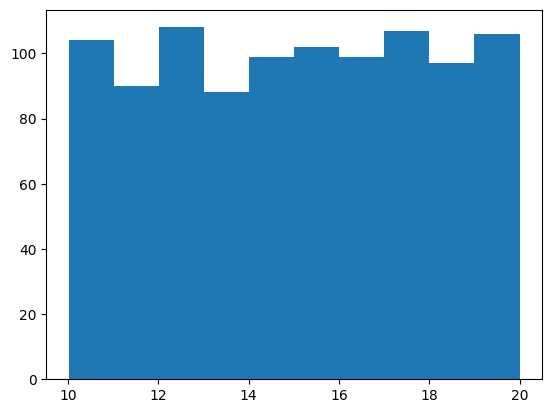

In [4]:
plot_histogram(sample_uniform(1000, 10, 20))

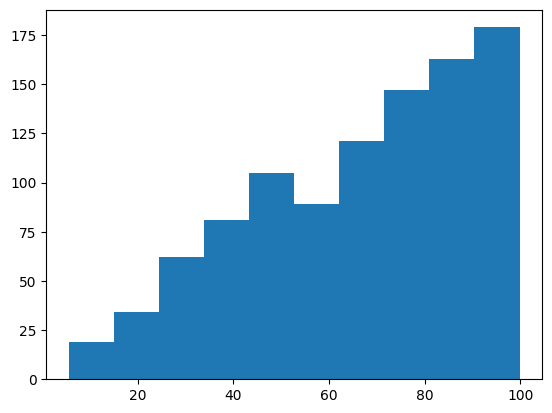

In [5]:
plot_histogram(sample_increasing(1000))

### Problem 0

Try playing with the sample size and see how the histogram change with each run. Check if the result match what you think. Explain in detail.

**Answer**. When the sample size is small, the histogram may not look as good as when the sample size is larger. The reason is that larger sample size more accurately represent the distribution.

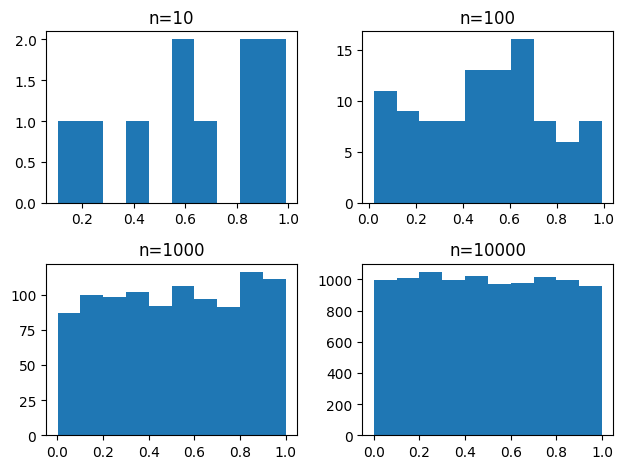

In [6]:
plt.subplot(221)
plt.hist(sample_uniform(10, 0, 1))
plt.title('n=10')
plt.subplot(222)
plt.hist(sample_uniform(100, 0, 1))
plt.title('n=100')
plt.subplot(223)
plt.hist(sample_uniform(1000, 0, 1))
plt.title('n=1000')
plt.subplot(224)
plt.hist(sample_uniform(10000, 0, 1))
plt.title('n=10000')
plt.tight_layout()
plt.show()

## Maximum Likelihood Estimation

### Problem 1

Machines in Hamtaro’s factory have their lifetime modelled by exponential distribution with an unknown parameter. Hamtaro found out that his machines failed after $x_1, x_2, ..., x_n$ years. Estimate the unknown parameter.

In [7]:
machine_failed_time = [2, 3, 1, 3, 4]   # In class example
# machine_failed_time = sample_exponential(5, 0.3)  # Sampled from exponential distribution

def prob1_mle(X):
  return len(X)/np.sum(X)

print('The estimated parameter is: {}'.format(prob1_mle(machine_failed_time)))

The estimated parameter is: 0.38461538461538464


### Problem 2

The number of attempts for the STATS COMP ENG class before passing following a Geometric distribution with unknown parameter. $n$ students failed $x_1, x_2, ..., x_n$ times before passing. Find the MLE of the parameter.

In [8]:
X = [0, 0, 2]
# X = sample_geometric(10, 0.9)   # Sample from actual geometric distribution

def prob2_mle(X):
  # [YOUR CODE HERE]
  return len(X)/(len(X)+np.sum(X))
  return 0

print('The MLE is {}'.format(prob2_mle(X)))

The MLE is 0.6


### Problem 3

Suppose our data $x_1, x_2, ..., x_n$ is randomly drawn from uniform distribution $U(a,b)$. Find MLE of $a$ and $b$.

In [9]:
X = sample_uniform(100, 60, 78)

def prob3_mle(X):
  # [YOUR CODE HERE]
  a = np.min(X)
  b = np.max(X)
  return a, b

a, b = prob3_mle(X)
print('The MLE is ({}, {})'.format(a, b))

The MLE is (60.07501199405724, 77.95227672212425)


## Maximum A Posteriori Estimation

### Problem 4

Toss an unknown coin $n$ times. The result has a head $h$ times. Koshi-kun told us that there are three possible coins:

- Coin A – P[H] = $c_a$
- Coin B – P[H] = $c_b$
- Coin C – P[H] = $c_c$

Koshi-kun also told us A, B, C has probability of being the coin with probability $p_a, p_b, p_c$, respectively. Find the MAP estimate.

In [10]:
num_coin = 3
coin_head_prob = [0.8, 0.5, 0.4]
coin_select_prob = [0.4, 0.4, 0.2]
n = 5
h = 2

In [ ]:
def coin_posterior(n, h, head_prob, select_prob):
  # ASSIGNMENT 2
  return math.comb(n, h) * head_prob ** h * (1-head_prob) ** (n-h) * select_prob
  return 0

p_map = 0
p_map_val = 0
for i in range(num_coin):
  posterior = coin_posterior(n, h, coin_head_prob[i], coin_select_prob[i])
  print('Coint {} has posterior of {}'.format(i, posterior))
  if posterior > p_map_val:
    p_map_val = posterior
    p_map = coin_head_prob[i]

print()
print('The estimated parameter is {}'.format(p_map))

Coint 0 has posterior of 0.002047999999999999
Coint 1 has posterior of 0.0125
Coint 2 has posterior of 0.006912000000000001

The estimated parameter is 0.5


### Problem 5

From https://xkcd.com/1132/. Assume that chance of the sun actually explode is $10^{-6}$. What are the chance that the machine said the sun exploded when it actually isn't?

In [12]:
sun_prior = 1e-6
lie_prob = 1/36

def check_sun():
  # [YOUR CODE HERE]
  exploded = True if random.random() < sun_prior else False
  lie = True if random.random() < lie_prob else False

  return exploded ^ lie
  return True

count_exploded = 0
ask_times = 1000000
for i in range(ask_times):
  if check_sun():
    count_exploded += 1

print('The sun exploded {} times.'.format(count_exploded))
print('Explode rate: {}'.format(count_exploded / ask_times))

The sun exploded 27819 times.
Explode rate: 0.027819


### Problem 6

Go back to problem 2-5, and try to play with input size and parameter. Observe the change in result. Explain in detail.

**Answer**. As input size get larger, MLE algorithm can esetimate the parameter more accurately. At lower input size, sometimes the estimated parameter is off by a lot.